# Coca-Cola Stock Price Analysis
This Jupyter Notebook analyzes historical stock price data for Coca-Cola (ticker: KO) from January 1, 2015, to December 31, 2024, using the `yfinance` library. The notebook includes steps to:
- Download stock data
- Perform exploratory data analysis (EDA)
- Add technical indicators (features)
- Check for missing values
- Visualize actual vs. predicted close prices (note: prediction model not included in this version)

The goal is to explore Coca-Cola's stock price trends and prepare the data for potential predictive modeling.

## Importing the Libraries
The following libraries are used in this notebook:
- `pandas`: For data manipulation and analysis
- `numpy`: For numerical computations
- `yfinance`: To download historical stock price data from Yahoo Finance
- `matplotlib.pyplot`: For creating visualizations
- `matplotlib.dates`: For formatting dates in plots
- `os`: For operating system interactions (not used in this notebook)
- `seaborn`: For enhanced visualizations (not used in this notebook but imported for potential future use)

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import os
import seaborn as sns

## Downloading Dataset
This section retrieves historical stock price data for Coca-Cola (KO) from Yahoo Finance using the `yfinance` library. The data spans from January 1, 2015, to December 31, 2024, and includes columns for Date, Open, High, Low, Close, and Volume. The index is reset to make the `Date` column part of the DataFrame.

In [3]:
data = yf.download('KO',start='2015-01-01',end='2025-01-01')
data.reset_index(inplace=True)
data.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_22112\2606650229.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('KO',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.222616,30.409089,29.978770,30.308679,9921100
1,2015-01-05,30.222616,30.817890,30.179586,30.617073,26292600
2,2015-01-06,30.452108,30.796362,30.294327,30.416249,16897500
3,2015-01-07,30.832230,30.918292,30.538180,30.695961,13412300
4,2015-01-08,31.205172,31.248204,30.911122,30.968499,21743600


## Basic Information
This section performs exploratory data analysis (EDA) to understand the dataset's structure, including:
- Data types and non-null counts (`info()`)
- Shape of the dataset (number of rows and columns)
- First and last five rows to inspect the data
- Column names
- Basic statistical summary (`describe()`) to analyze metrics like mean, min, max, and standard deviation for numerical columns.

In [4]:
print("Basic INformation\n\n",data.info())
print()
print("Shape of the dataset:",data.shape)
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)
print()
print("Basic Statictis",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2516 non-null   datetime64[ns]
 1   (Close, KO)   2516 non-null   float64       
 2   (High, KO)    2516 non-null   float64       
 3   (Low, KO)     2516 non-null   float64       
 4   (Open, KO)    2516 non-null   float64       
 5   (Volume, KO)  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
Basic INformation

 None

Shape of the dataset: (2516, 6)
First Data

 Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.222616  30.409089  29.978770  30.308679   9921100
1      2015-01-05  30.222616  30.817890  30.179586  30.617073  26292600
2      2015-01-06  30.452108  30.796362  30.294327  30.416249  1

## Checking for Missing Values
This section checks the dataset for any missing values in each column using `isnull().sum()`. This is an important step to ensure the data is complete before proceeding with analysis or modeling.

In [5]:
data.isnull().sum()

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64

## Feature Addition
This section adds new features to the dataset for technical analysis:
- **Difference per day**: The daily price range (High - Low), indicating volatility.
- **Upper wick**: The difference between the High and the maximum of Open/Close, used in candlestick charting.
- **Lower wick**: The difference between the minimum of Open/Close and the Low, also used in candlestick charting.
- **Avg Growth**: A custom metric calculated as the average of Open, High, Low, and Close multiplied by Volume (note: the financial significance of this metric is unclear).

The MultiIndex columns are flattened for simplicity, and the updated column names are printed.

In [6]:
data['Differcence per day'] = data['High'] - data['Low']
data.columns = data.columns.get_level_values(0)
# data['Differcence per day'].head()
data['Upper wick'] = data['High'] - data[['Open', 'Close']].max(axis=1)
data['Lower wick'] = data[['Open', 'Close']].min(axis=1) - data['Low']
data['Avg Growth'] = ((data['Low']+data['High']+data["Close"]+data['Open'])/4)*data['Volume']
print(data.columns.tolist())



['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Differcence per day', 'Upper wick', 'Lower wick', 'Avg Growth']


## Open vs. Close Prices Plot
This section plots Coca-Cola (KO) `Open` (blue) and `Close` (red) prices from 2015-2024 using `seaborn`. The line plot includes a title, labeled axes, legend, and grid, and is saved as `Open vs Close Price.png` in the `Output Images` directory.

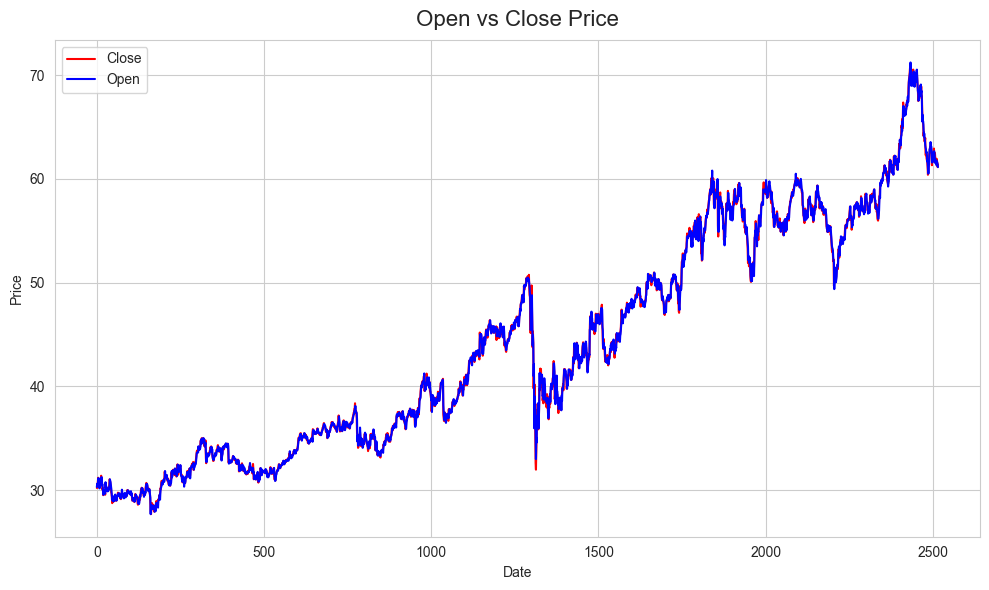

In [7]:

sns.set_style('whitegrid')  # Optional: better visuals
plt.figure(figsize=(10, 6))  # Larger size

sns.lineplot(data=data['Close'], color='red',label='Close')
sns.lineplot(data=data['Open'], color='blue', label='Open')

plt.legend()
plt.title('Open vs Close Price',fontsize=16,pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open vs Close Price.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')

## Open vs. Close Prices for Last Year
This section plots Coca-Cola (KO) `Open` (blue) and `Close` (red) prices for the last year using `seaborn`. It counts days where `Open` > `Close` (`open_count`) and `Close` >= `Open` (`close_count`), displaying these in a text box. The plot includes:
- Monthly date formatting
- A title, labeled axes, legend, and grid
- A saved PNG (`Open_vs_Close_Price_Last_Year.png`) in `Output Images`

This helps analyze daily price movements and trends.Open_vs_Close_Price_Last_Year

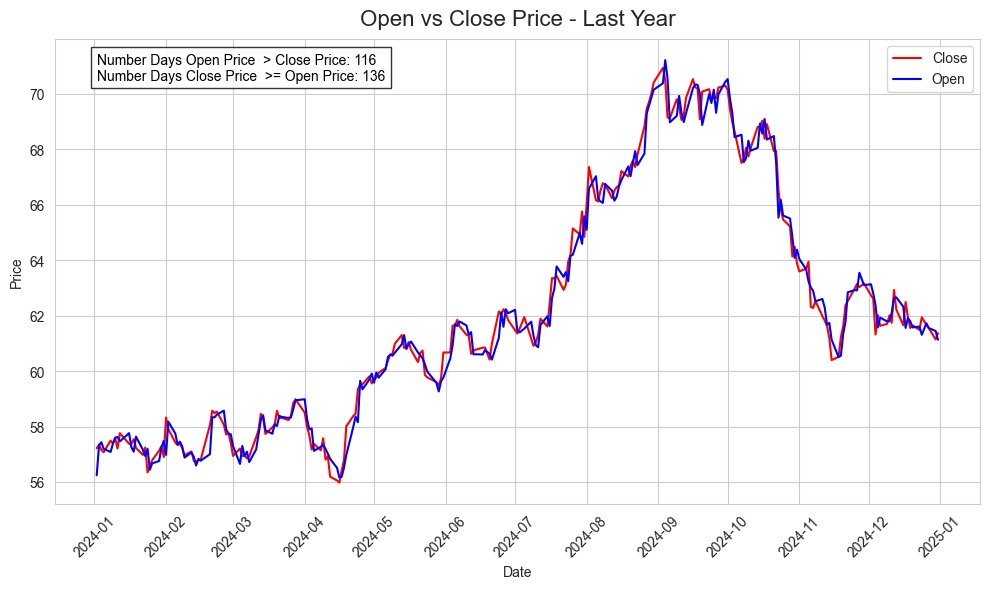

Days Open > Close: 116
Days Close >= Open: 136


In [8]:
# Filter last year
lastyear = data.loc[data['Date'] >= data['Date'].max() - pd.DateOffset(years=1)]

# Count days where Open > Close
open_count, close_count = 0, 0
open_greater_dates = []
open_greater_values = []
for index, row in lastyear.iterrows():
    if row['Open'] > row['Close']:
        open_count += 1
        open_greater_dates.append(row['Date'])
        open_greater_values.append((row['Open'], row['Close']))
    else:
        close_count += 1

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=lastyear, color='red', label='Close')
sns.lineplot(x='Date', y='Open', data=lastyear, color='blue', label='Open')

# Annotate a few points where Open > Close (to avoid clutter, limit to first 3)

# Add summary text for open/close counts
plt.text(
    x=lastyear['Date'].min(),  # Place at the start of the x-axis
    y=lastyear[['Open', 'Close']].max().max()*0.99,  # Near top of y-axis
    s=f'Number Days Open Price  > Close Price: {open_count}\nNumber Days Close Price  >= Open Price: {close_count}',
    fontsize=10,
    color='black',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Labels
plt.title('Open vs Close Price - Last Year', fontsize=16, pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Save and show
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open_vs_Close_Price_Last_Year.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Days Open > Close: {open_count}")
print(f"Days Close >= Open: {close_count}")

## Top 10 Days by Price Range
Plots top 10 days with largest `Difference per day` (High - Low) for Coca-Cola (KO) using `seaborn` bar plot. Includes title, rotated date labels, and saves as PNG in `Output Images`. Shows most volatile days.

<function matplotlib.pyplot.show(close=None, block=None)>

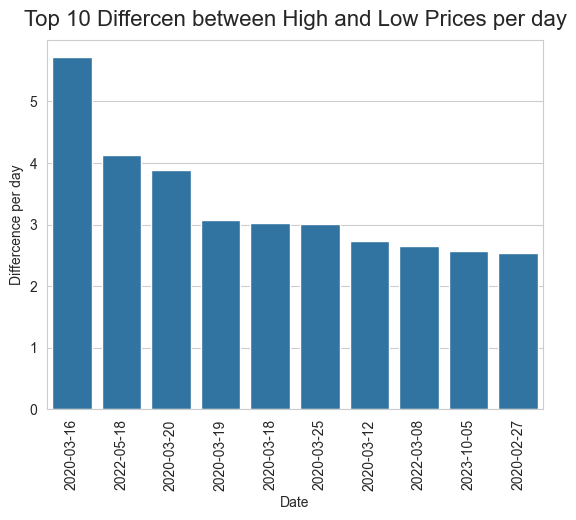

In [9]:
top10 = data.sort_values(by='Differcence per day',ascending=False).head(10)
sns.set_style('whitegrid')
plt.Figure(figsize=(5,5))
plt.title("Top 10 Differcen between High and Low Prices per day",fontsize=16,pad=10)

sns.barplot(data=top10,x=top10['Date'], y = top10['Differcence per day'])
plt.xticks(rotation=90)
output_path = os.path.join('Output Images', 'Top 10 Day with Difference between High and Low Prices per day.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show

## Average High by Quarter (2020–2025)
Plots average `High` price of Coca-Cola (KO) stock per year by quarter (Q1: Jan–Mar, Q2: Apr–Jun, Q3: Jul–Sep, Q4: Oct–Dec) from 2020–2024 using `seaborn` line plots. Each quarter uses a distinct color and marker. Includes title, labeled axes, legend, grid, and saves as PNG in `Output Images`. Shows seasonal trends.

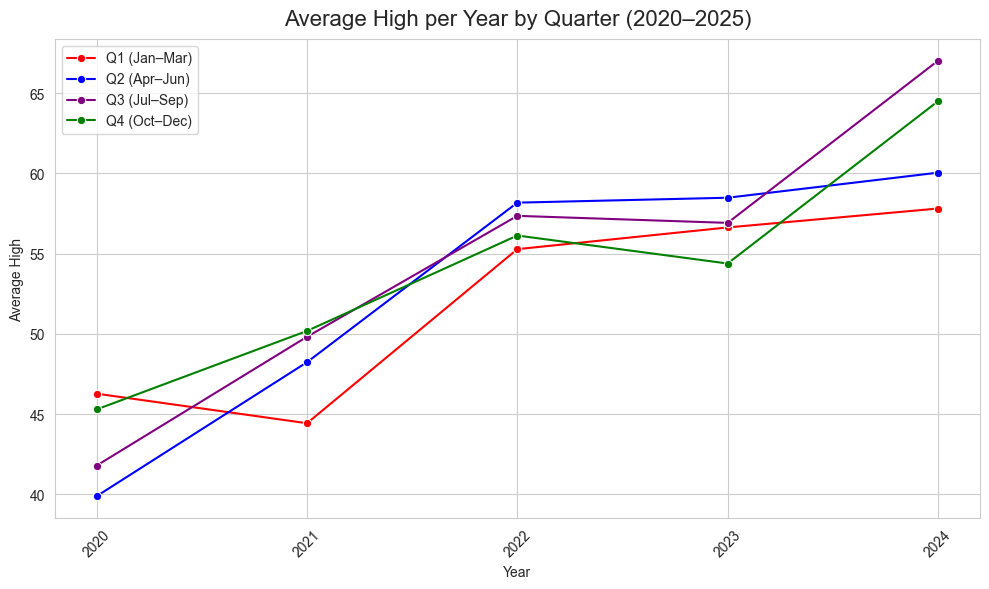

In [11]:
# Assuming your DataFrame is named 'data' and 'Date' column is already in datetime format.

# Q1: Jan–Mar
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q1 = Q1.groupby(Q1['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q1.columns = ['Year', 'High']

# Q2: Apr–Jun
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = Q2.groupby(Q2['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q2.columns = ['Year', 'High']

# Q3: Jul–Sep
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = Q3.groupby(Q3['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q3.columns = ['Year', 'High']

# Q4: Oct–Dec
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = Q4.groupby(Q4['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q4.columns = ['Year', 'High']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='High', data=Q1, marker='o', color='red', label='Q1 (Jan–Mar)')
sns.lineplot(x='Year', y='High', data=Q2, marker='o', color='blue', label='Q2 (Apr–Jun)')
sns.lineplot(x='Year', y='High', data=Q3, marker='o', color='purple', label='Q3 (Jul–Sep)')
sns.lineplot(x='Year', y='High', data=Q4, marker='o', color='green', label='Q4 (Oct–Dec)')

plt.title('Average High per Year by Quarter (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('Average High')
plt.xticks(Q1['Year'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = os.path.join('Output Images', 'Average High per Year by Quarter (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

## Quarterly High Prices (2020–2025)
Plots `High` prices of Coca-Cola (KO) stock for each quarter (Q1: Jan–Mar, Q2: Apr–Jun, Q3: Jul–Sep, Q4: Oct–Dec) from 2020–2024 using `seaborn` line plots. Each quarter uses a distinct color. Includes yearly x-axis, title, labeled axes, legend, and saves as PNG in `Output Images`. Shows quarterly price trends.

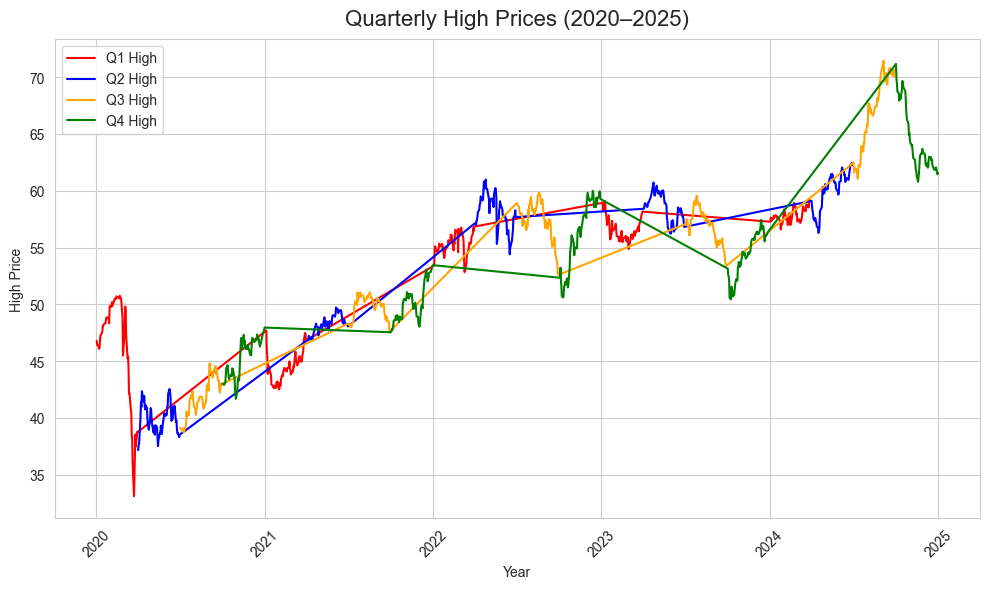

In [12]:

# Filter each quarter between 2020 and 2025
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quarter
sns.lineplot(x='Date', y='High', data=Q1, ax=ax, color='red', label='Q1 High')
sns.lineplot(x='Date', y='High', data=Q2, ax=ax, color='blue', label='Q2 High')
sns.lineplot(x='Date', y='High', data=Q3, ax=ax, color='orange', label='Q3 High')
sns.lineplot(x='Date', y='High', data=Q4, ax=ax, color='green', label='Q4 High')

# Formatting the X-axis with year only
ax.xaxis.set_major_locator(pltdates.YearLocator())
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Labels and title
plt.title('Quarterly High Prices (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('High Price')
plt.legend()
plt.tight_layout()

# Save the plot
output_path = os.path.join('Output Images', 'Quarterly High Prices (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()


## Simple Moving Averages (2024)
Plots 20-day and 50-day Simple Moving Averages (SMA) of Coca-Cola (KO) `Close` prices for 2024 using `seaborn` line plots. The 50-day SMA (blue) and 20-day SMA (orange) are shown with a title, labeled axes, legend, and tight layout. Highlights short-term vs. long-term price trends.

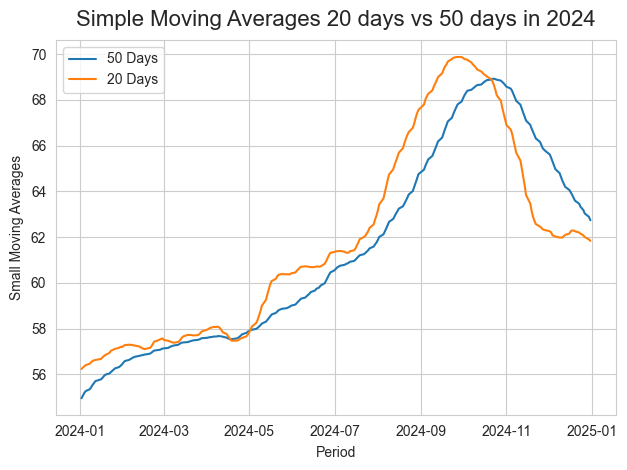

In [13]:
data["SMA_50"] = data['Close'].rolling(window=50).mean()
data["SMA_20"] = data['Close'].rolling(window=20).mean()
db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]
sns.lineplot(data=db,x=db['Date'],y=db['SMA_50'],label="50 Days")
sns.lineplot(data=db,x=db['Date'],y=db['SMA_20'],label="20 Days")

plt.title("Simple Moving Averages 20 days vs 50 days in 2024" ,fontsize=16,pad=10)
plt.xlabel('Period',fontsize=10,labelpad=5)
plt.ylabel('Small Moving Averages',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()
plt.show()



## Bollinger Bands (2024)
Plots Bollinger Bands for Coca-Cola (KO) `Close` prices in 2024 using `seaborn` line plots. Shows 20-day SMA (`BB_Middle`), Upper Band (`BB_Middle + 2*std`), and Lower Band (`BB_Middle - 2*std`). Includes title, labeled axes, legend, and saves as PNG in `Output Images`. Highlights price volatility.

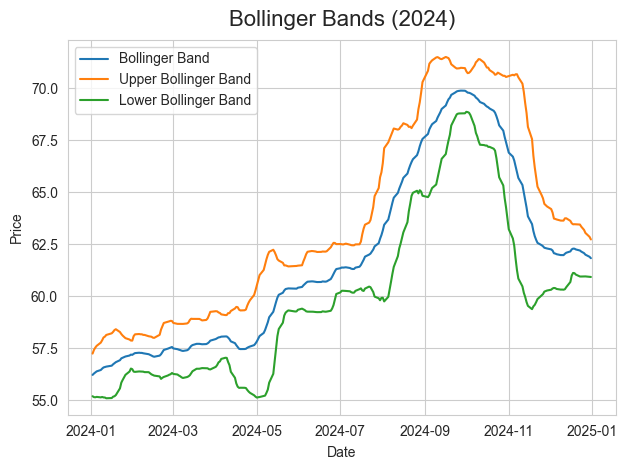

In [14]:
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + (data['BB_std'] * 2)
data['BB_Lower'] = data['BB_Middle'] - (data['BB_std'] * 2)

db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(data=db ,x=db['Date'],y=db['BB_Middle'],label='Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Upper'],label='Upper Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Lower'],label='Lower Bollinger Band')

plt.title('Bollinger Bands (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('Price',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()

output_path = os.path.join('Output Images', "bollinger_bands_2024.png")
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

## RSI Indicator (2024)
Plots the 14-day Relative Strength Index (RSI) for Coca-Cola (KO) `Close` prices in 2024 using `seaborn` line plot. Shows RSI with overbought (70, red) and oversold (30, green) thresholds. Includes title, labeled axes, legend, and saves as PNG in `Output Images`. Identifies momentum trends.

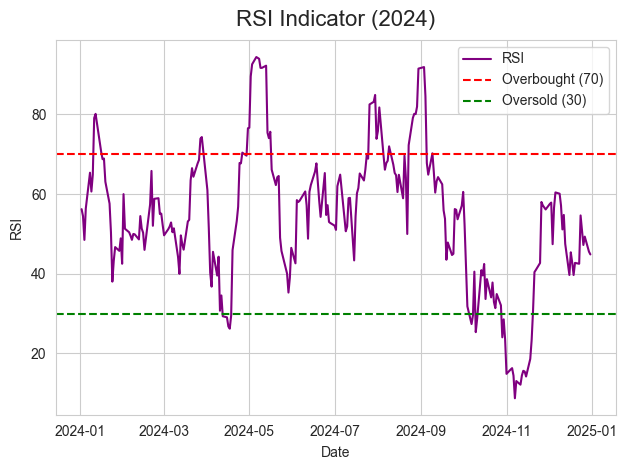

In [15]:
def cal_rsi(data,peroid=14):
    delta=data["Close"].diff()
    gain = (delta.where(delta>0,0)).fillna(0)
    loss = (-delta.where(delta<0,0)).fillna(0)
    
    avg_gain = gain.rolling(window=peroid).mean()
    avg_loss = loss.rolling(window=peroid).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 -(100/(1+rs))
    data['RSI'] = rsi
    return data

data = cal_rsi(data)
rsi_data = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(x='Date', y='RSI', data=rsi_data, color='purple', label='RSI')
plt.title('RSI Indicator (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('RSI',fontsize=10,labelpad=5)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.tight_layout()
plt.legend()

plt.savefig("Output Images/rsi_2024.png",dpi=300,bbox_inches='tight')
plt.show()

## Downloading PepsiCo and Monster Beverage Data
Downloads historical stock data for PepsiCo (PEP) and Monster Beverage (MNST) from 2015 to 2024 using `yfinance`. Resets index to include `Date` as a column, displays first five rows, and checks for missing values. Flattens MultiIndex columns for simplicity.

In [16]:
# PepsiCo
data1 = yf.download('PEP',start='2015-01-01',end='2025-01-01')
data1.reset_index(inplace=True)
data1.head()
print("Num value Count for Pepsico :",data1.isnull().sum())
# Monster Beverage
data2 = yf.download('MNST',start='2015-01-01',end='2025-01-01')
data2.reset_index(inplace=True)
data2.head()
print("Num value Count for Monster Beverage :",data2.isnull().sum())
data1.columns = data1.columns.get_level_values(0)
data2.columns = data2.columns.get_level_values(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_22112\4000411600.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('PEP',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_22112\4000411600.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('MNST',start='2015-01-01',end='2025-01-01')


Num value Count for Pepsico : Price   Ticker
Date              0
Close   PEP       0
High    PEP       0
Low     PEP       0
Open    PEP       0
Volume  PEP       0
dtype: int64


[*********************100%***********************]  1 of 1 completed

Num value Count for Monster Beverage : Price   Ticker
Date              0
Close   MNST      0
High    MNST      0
Low     MNST      0
Open    MNST      0
Volume  MNST      0
dtype: int64


## Stock Price Comparison (Coke vs. Pepsi vs. Monster)
Plots closing prices of Coca-Cola (KO), PepsiCo (PEP), and Monster Beverage (MNST) from 2015 to 2024 using `seaborn` line plots. Each stock uses a distinct color and label. Includes title, labeled axes, legend, grid, and saves as PNG in `Output Images`. Compares performance across beverage companies.

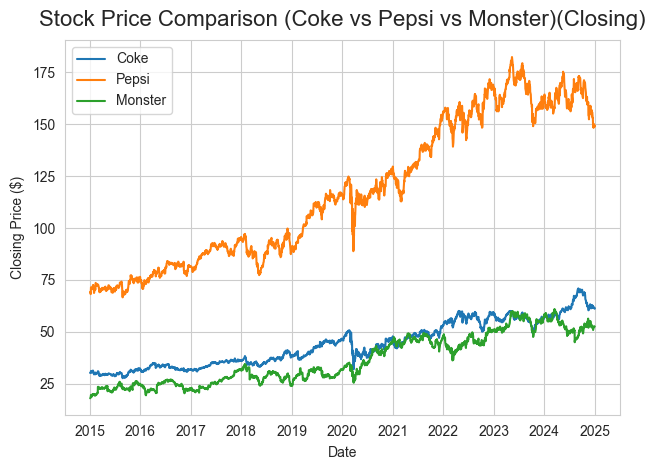

<Figure size 640x480 with 0 Axes>

In [17]:
sns.lineplot(data=data, x='Date', y='Close', label="Coke")
sns.lineplot(data=data1, x='Date', y='Close', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Close', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Closing Price ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# print(data['Close'].shape) 
# print(data1['Close'].shape) 
# print(data2['Close'].shape) 

plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing).png",dpi=300,bbox_inches='tight')
plt.show()

## Stock Price Comparison (Coke vs. Pepsi vs. Monster) - Opening
Plots opening prices of Coca-Cola (KO), PepsiCo (PEP), and Monster Beverage (MNST) from 2015 to 2024 using `seaborn` line plots. Each stock uses a distinct color and label. Includes title, labeled axes, legend, grid, and saves as PNG in `Output Images`. Compares opening price trends across beverage companies.

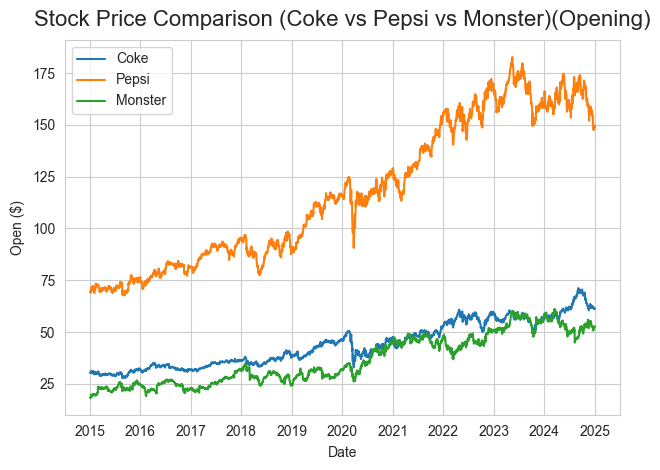

In [18]:
sns.lineplot(data=data, x='Date', y='Open', label="Coke")
sns.lineplot(data=data1, x='Date', y='Open', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Open', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Open ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening).png",dpi=300,bbox_inches='tight')
plt.show()


## Quarterly High Prices Comparison (2020–2025)
Plots quarterly `High` prices for Coca-Cola (KO), PepsiCo (PEP), and Monster Beverage (MNST) from 2020–2024 using `seaborn` line plots in three subplots. Each quarter (Q1–Q4) uses a distinct color. Includes titles, yearly x-axis, legends, and saves as PNG in `Output Images`. Compares quarterly performance across companies.

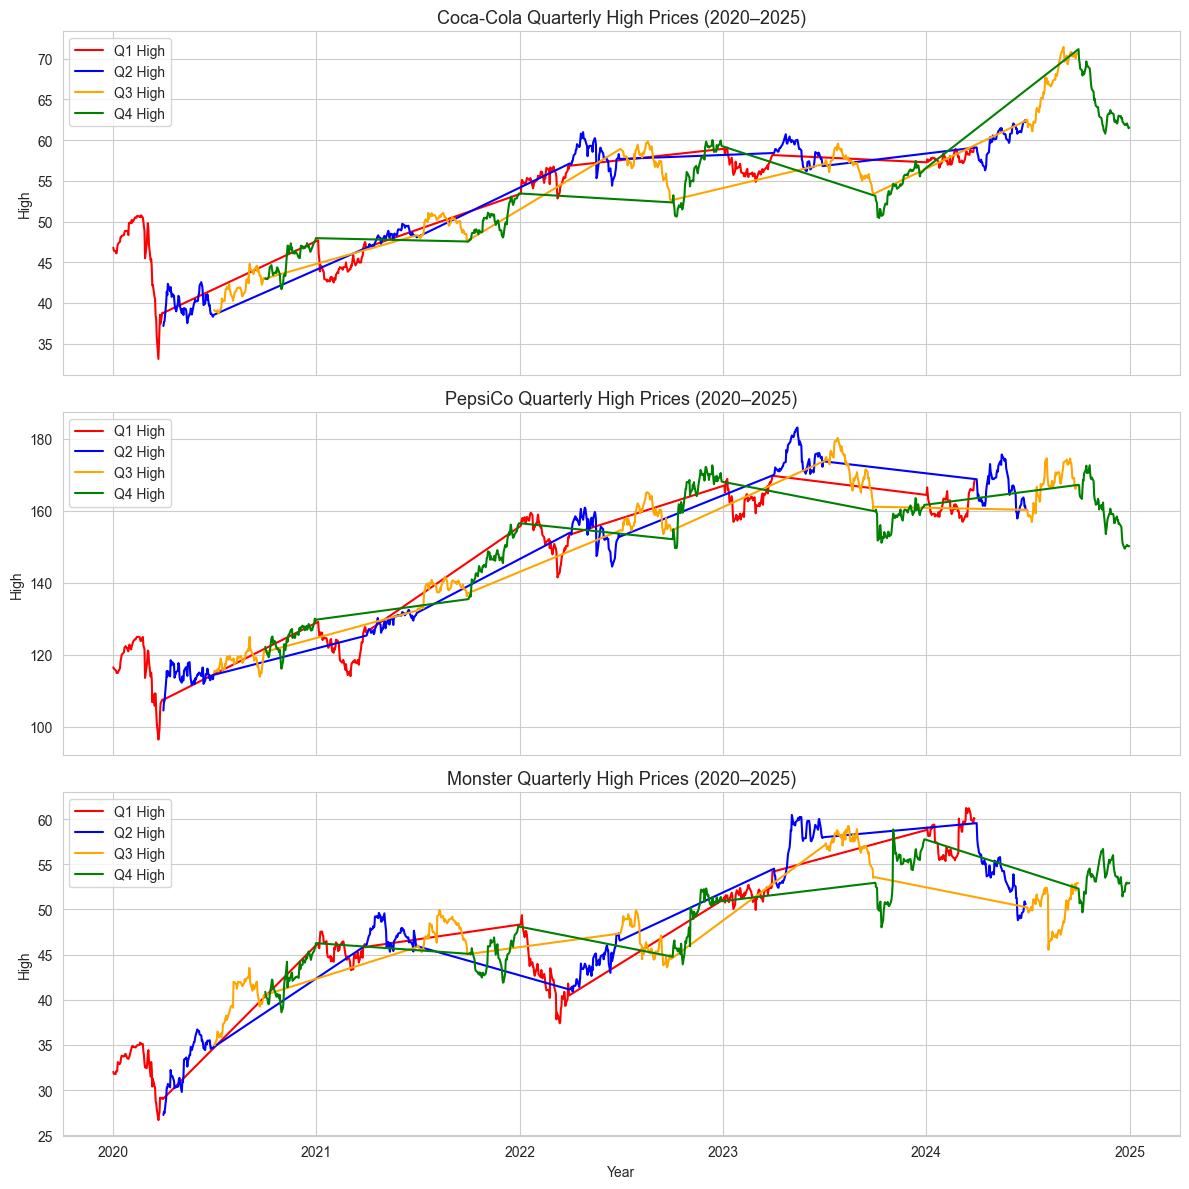

In [19]:
# Function to split quarters
def split_quarters(df):
    df = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2025)]
    quarters = {
        'Q1': df[df['Date'].dt.month.isin([1, 2, 3])],
        'Q2': df[df['Date'].dt.month.isin([4, 5, 6])],
        'Q3': df[df['Date'].dt.month.isin([7, 8, 9])],
        'Q4': df[df['Date'].dt.month.isin([10, 11, 12])]
    }
    return quarters

# Split data for Coca-Cola, Pepsi, Monster
quarters_coke = split_quarters(data)
quarters_pepsi = split_quarters(data1)
quarters_monster = split_quarters(data2)

# Colors for quarters
colors = {'Q1': 'red', 'Q2': 'blue', 'Q3': 'orange', 'Q4': 'green'}

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
companies = [('Coca-Cola', quarters_coke), ('PepsiCo', quarters_pepsi), ('Monster', quarters_monster)]

for ax, (title, quarters) in zip(axes, companies):
    for q, df in quarters.items():
        sns.lineplot(x='Date', y='High', data=df, ax=ax, label=f'{q} High', color=colors[q])
    ax.set_title(f'{title} Quarterly High Prices (2020–2025)', fontsize=13)
    ax.xaxis.set_major_locator(pltdates.YearLocator())
    ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
    ax.legend()

# Final layout
plt.xlabel('Year')
plt.savefig("Output Images/Quaterly Performace of three companies.png",dpi=300,bbox_inches='tight')
plt.tight_layout()

## 🔧 Imported Libraries Overview

### 🧪 Data Splitting & Preprocessing
- **`train_test_split`** – Splits the dataset into training and testing sets.
- **`StandardScaler`** – Standardizes features (mean = 0, std = 1) for better model performance.

### 🤖 Machine Learning Models
- **`LinearRegression`** – Fits a linear model for regression tasks.
- **`RandomForestRegressor`** – An ensemble model that builds multiple decision trees and averages their results.

### 📊 Evaluation Metrics
- **`mean_squared_error` (MSE)** – Penalizes large errors more heavily.
- **`mean_absolute_error` (MAE)** – Measures average magnitude of errors.
- **`r2_score` (R²)** – Indicates how well the model explains variability in the target variable.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Preparing Features and Target
Selects features (`Open`, `High`, `Low`, `Volume`) and creates a `Target` column with next day's `Close` price. Removes the last row to align data. Displays first five rows of selected features, `Close`, and `Target` for Coca-Cola (KO) stock.

In [33]:
feature = ['Open','High','Low','Volume']
data["Target"] = data['Close'].shift(-1)
data = data[:-1]
data[feature + ['Close','Target']].head()

Price,Open,High,Low,Volume,Close,Target
0,30.308679,30.409089,29.978770,9921100,30.222616,30.222616
1,30.617073,30.817890,30.179586,26292600,30.222616,30.452108
2,30.416249,30.796362,30.294327,16897500,30.452108,30.832230
3,30.695961,30.918292,30.538180,13412300,30.832230,31.205172
4,30.968499,31.248204,30.911122,21743600,31.205172,30.860924


## 🔍 Linear Regression Modeling

- Select features and target
- Split data into training and testing sets (no shuffle)
- Standardize features using `StandardScaler`
- Train a `LinearRegression` model
- Predict on test data
- Evaluate performance using MAE, RMSE, and R² Score


In [22]:
X = data[feature]
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.2)

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

print("Mean error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean error: 0.40282594646221137
Root Mean Squared Error (RMSE): 0.5238249075923181
R² Score: 0.9860188143775495


## 📊 Visualization

- Plot of **Actual vs Predicted** stock prices
- Line plot of **Prediction Errors** (Actual − Predicted)

C:\Users\HP\AppData\Local\Temp\ipykernel_22112\3638630038.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
e:\temp codes\Coca-cola stock (live and updated)\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


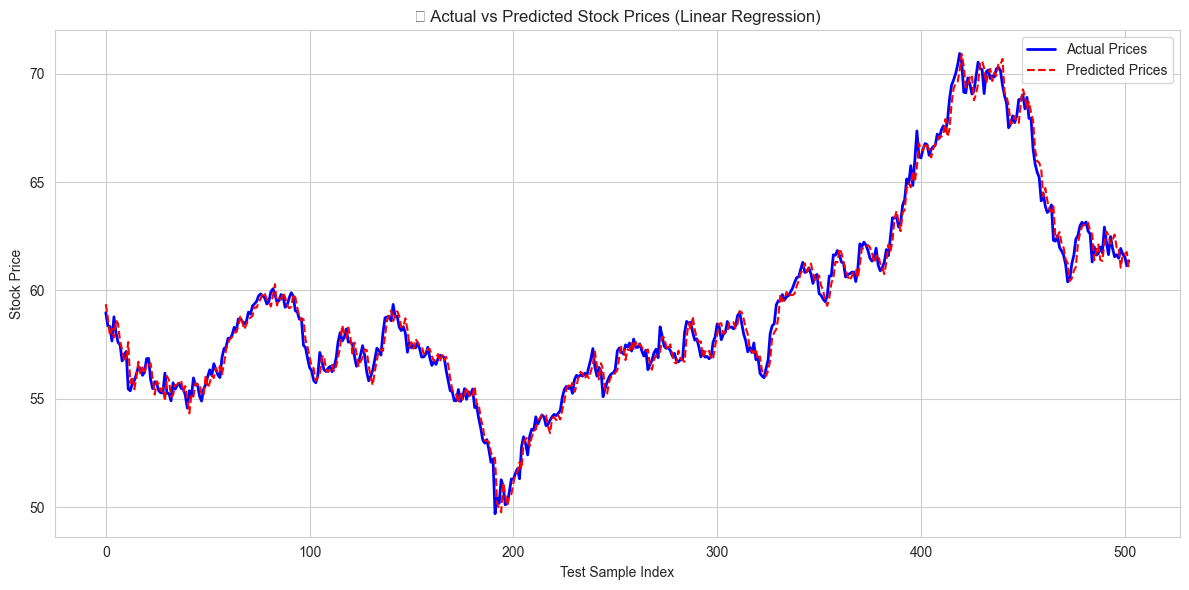

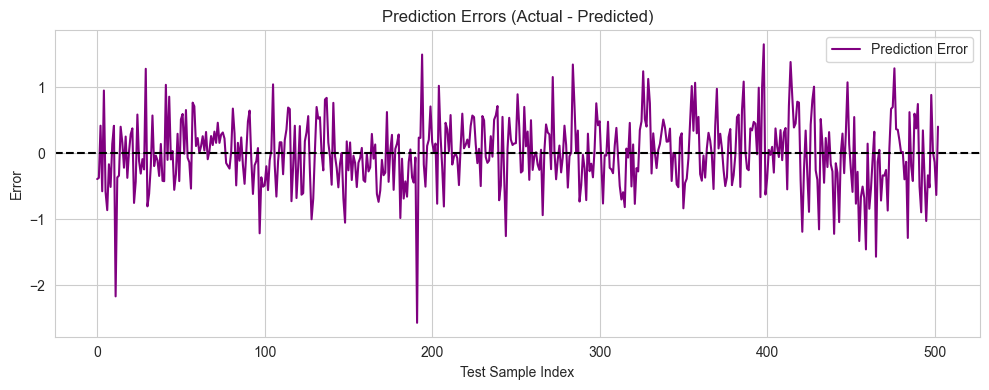

In [23]:

# Line plot of actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('📈 Actual vs Predicted Stock Prices (Linear Regression)')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Plot the prediction error
errors = y_test.values - y_pred
plt.figure(figsize=(10, 4))
plt.plot(errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Test Sample Index')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()


## 📥 Data Download – Coca-Cola (KO)

- Fetch historical stock data for **Coca-Cola (KO)** from Yahoo Finance  
- Time range: **Jan 1, 2025** to **July 1, 2025**
- Reset index and flatten column levels

In [24]:
data4 = yf.download('KO',start='2025-01-01',end='2025-07-01')
data4.reset_index(inplace=True)
data4.head()
data4.columns = data4.columns.get_level_values(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_22112\2296703755.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download('KO',start='2025-01-01',end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


## 🕒 Date Feature Engineering

- Extracted the following components from `Date`:
  - `Year`, `Month`, `Day`
  - `DayOfYear` – day number in the year
  - `Week` – ISO calendar week number
- Applied to both `data` and `data4` DataFrames


In [25]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)

data4['Year'] = data4['Date'].dt.year
data4['Month'] = data4['Date'].dt.month
data4['Day'] = data4['Date'].dt.day
data4['DayOfYear'] = data4['Date'].dt.dayofyear
data4['Week'] = data4['Date'].dt.isocalendar().week.astype(int)

## 🧹 Train–Test Split (Date-Based)

- Selected time-based features: `Year`, `Month`, `Day`, `DayOfYear`, `Week`
- **Train data:** before Jan 1, 2025 (`data`)
- **Test data:** before July 1, 2025 (`data4`)
- Split into:
  - `X_train`, `y_train` → Features and target for training
  - `X_test`, `y_test` → Features and target for testing


In [26]:
feature_cols = ['Year', 'Month', 'Day', 'DayOfYear', 'Week']

train_data = data[data['Date'] < '2025-01-01']
test_data = data4[data4['Date'] < '2025-07-01' ]


X_train = train_data[feature_cols]
y_train = train_data['Close']

X_test = test_data[feature_cols]
y_test = test_data['Close']

## 🌲 Random Forest Regression

- Standardized train and test feature sets
- Trained a `RandomForestRegressor` with 100 trees
- Evaluated performance using:
  - **MAE** (Mean Absolute Error)
  - **RMSE** (Root Mean Squared Error)
  - **R² Score**


In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 9.704670910757097
RMSE: 10.252177080458795
R² Score: -6.33619613481567


## 🚀 Improved Model Pipeline (Random Forest)

- Merged `data` and `data4`, sorted by date  
- Engineered features: `Prev_Close`, MAs, `Return`, `Volatility`  
- Dropped rows with NaNs from rolling calculations  
- Train/test split based on date (before/after 2025-01-01)  
- Scaled features, trained `RandomForestRegressor`  
- Evaluated using MAE, RMSE, and R² Score


In [28]:
# Combine data before splitting
full_data = pd.concat([data, data4], ignore_index=True)

# Sort by Date
full_data['Date'] = pd.to_datetime(full_data['Date'])  # Ensure datetime format
full_data.sort_values('Date', inplace=True)

# Generate features on full combined dataset
full_data['Prev_Close'] = full_data['Close'].shift(1)
full_data['MA5'] = full_data['Close'].rolling(window=5).mean()
full_data['MA20'] = full_data['Close'].rolling(window=20).mean()
full_data['MA50'] = full_data['Close'].rolling(window=50).mean()
full_data['Return'] = full_data['Close'].pct_change()
full_data['Volatility'] = full_data['Return'].rolling(window=10).std()

# Drop rows with missing values (due to rolling)
selected_cols = [
    'Date', 'Close',              # target + time
    'Prev_Close', 'MA5', 'MA20', 'MA50', 'Return', 'Volatility',  # features                    # optional
]

full_data = full_data[selected_cols]
full_data.dropna(inplace=True)

# ✅ Updated date split (we use 2024 instead of 2025 since your data ends at 2024-12-30)
train_data = full_data[full_data['Date'] < '2025-01-01']
test_data = full_data[full_data['Date'] >= '2025-01-01']

# Define feature columns
feature_cols = ['Prev_Close', 'MA5', 'MA20', 'MA50', 'Return', 'Volatility']

X_train = train_data[feature_cols]
y_train = train_data['Close']

X_test = test_data[feature_cols]
y_test = test_data['Close']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.9620733364292832
RMSE: 1.2619460031635432
R² Score: 0.8888472323496849


## 📊 Visualization

- Plot of **Actual vs Predicted** stock prices
- Line plot of **Prediction Errors** (Actual − Predicted)

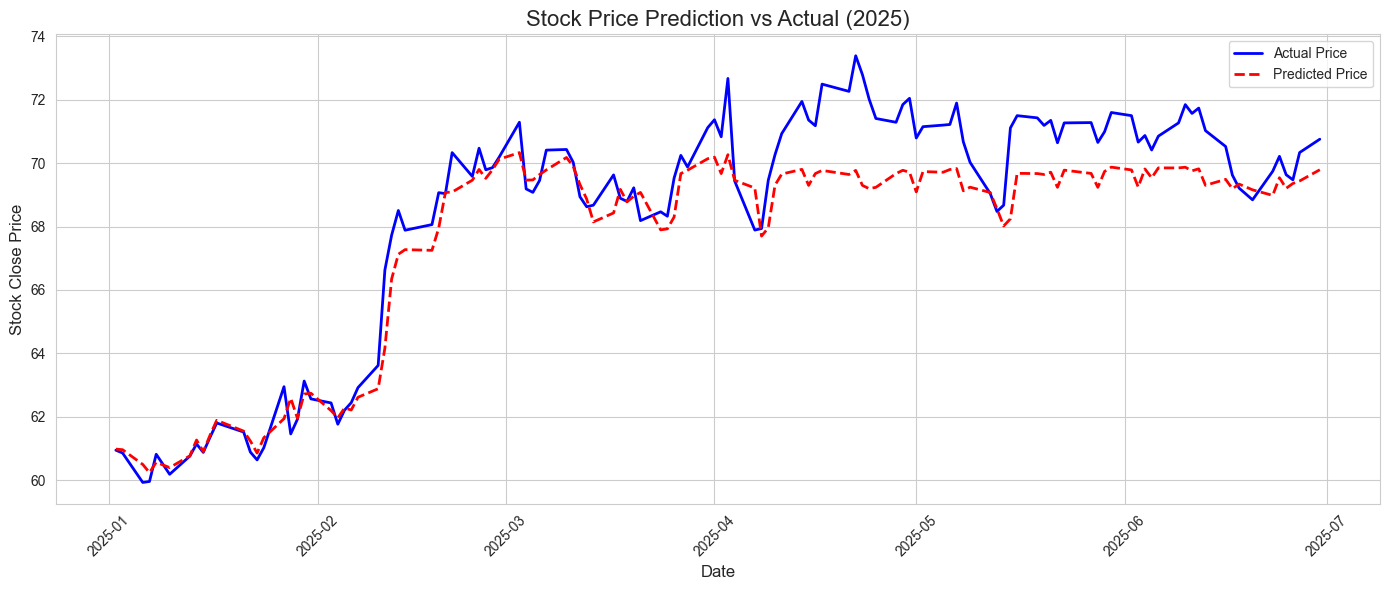

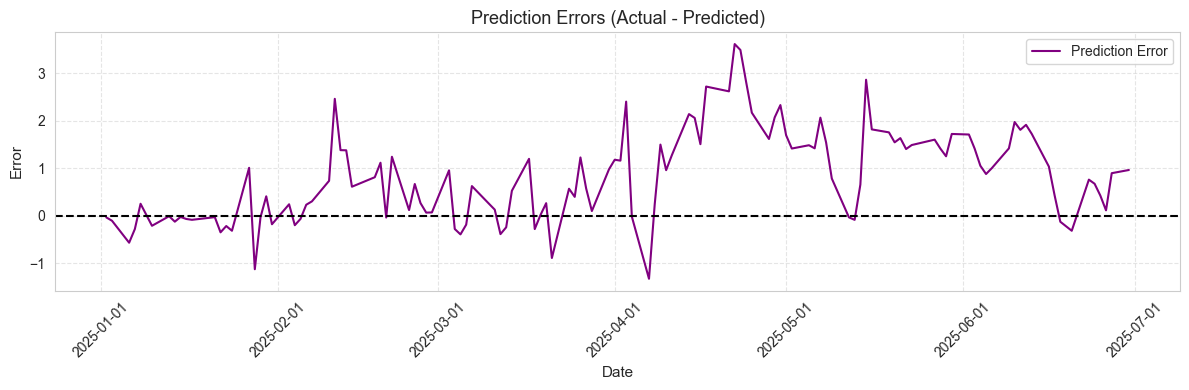

In [29]:


# Make sure y_test uses Date as its index (optional but helps if you're plotting y_test alone)
y_test.index = test_data['Date']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_data['Date'], y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred, label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Formatting
plt.title('Stock Price Prediction vs Actual (2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Optional: Format date x-axis for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# --- Prediction Error Plot ---
errors = y_test.values - y_pred
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title('Prediction Errors (Actual - Predicted)', fontsize=13)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Error', fontsize=11)

# Format the date ticks
plt.gca().xaxis.set_major_locator(pltdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ⚡ XGBoost Regressor

- Tuned XGBoost model with:
  - `n_estimators=1000`, `learning_rate=0.01`, `max_depth=5`
  - Regularization: `reg_alpha`, `reg_lambda`, `gamma`
  - Subsampling and column sampling for generalization
  - `early_stopping_rounds=10` on validation set

- Trained on scaled data  
- Evaluated using MAE, RMSE, and R² Score


In [30]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    gamma=0.1,
    min_child_weight=3,
    random_state=42,
    early_stopping_rounds=10  # Move early_stopping_rounds here
)

model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)


# Predict
y_pred = model.predict(X_test_scaled)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.9690208435058594
RMSE: 1.2643144127709847
R² Score: 0.8884296196788058


## 📊 Visualization

- Plot of **Actual vs Predicted** stock prices
- Line plot of **Prediction Errors** (Actual − Predicted)

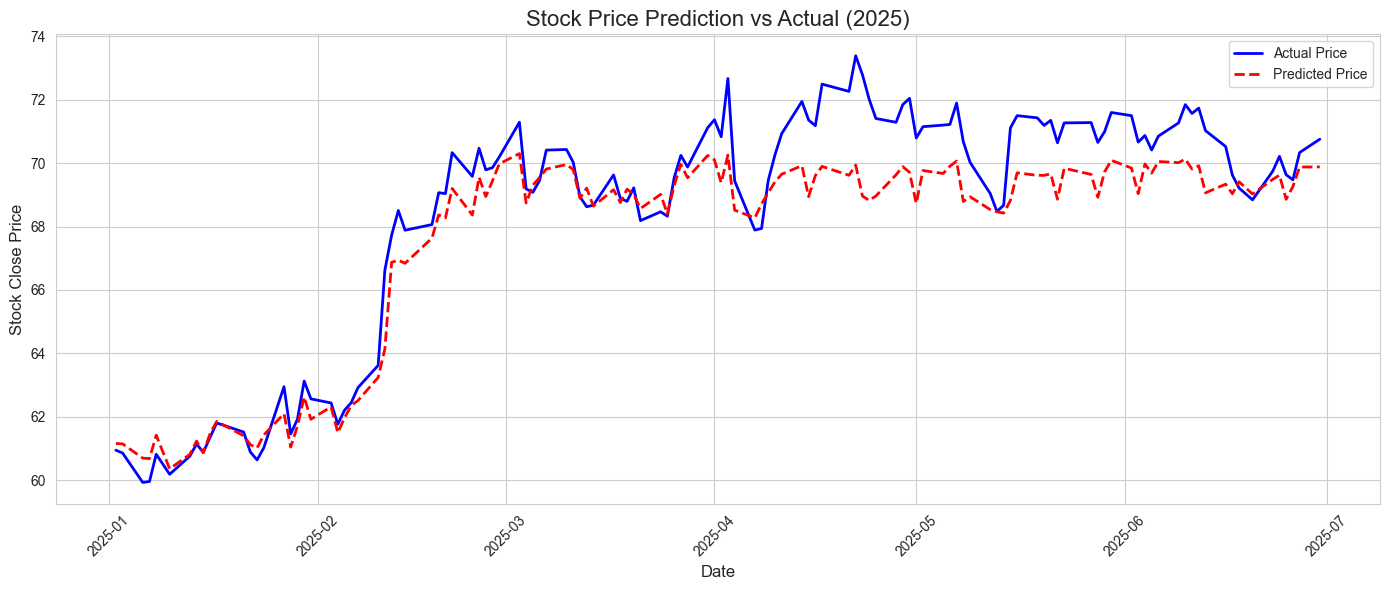

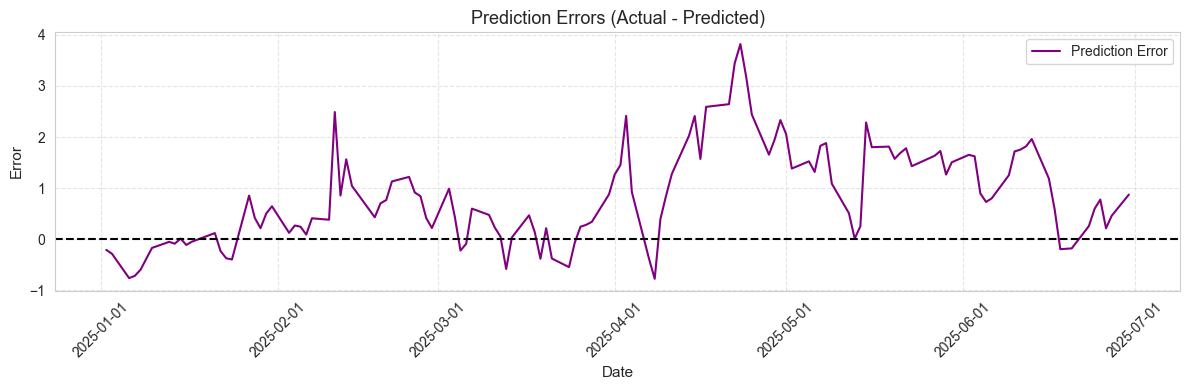

In [31]:


# Make sure y_test uses Date as its index (optional but helps if you're plotting y_test alone)
y_test.index = test_data['Date']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_data['Date'], y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred, label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Formatting
plt.title('Stock Price Prediction vs Actual (2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Optional: Format date x-axis for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# --- Prediction Error Plot ---
errors = y_test.values - y_pred
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title('Prediction Errors (Actual - Predicted)', fontsize=13)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Error', fontsize=11)

# Format the date ticks
plt.gca().xaxis.set_major_locator(pltdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 📊 Actual vs Predicted Close Price (2025)

- Visualized model predictions vs actual values from **Jan to Dec 2025**
- Line plot with markers for better clarity
- Helps assess time-wise prediction accuracy


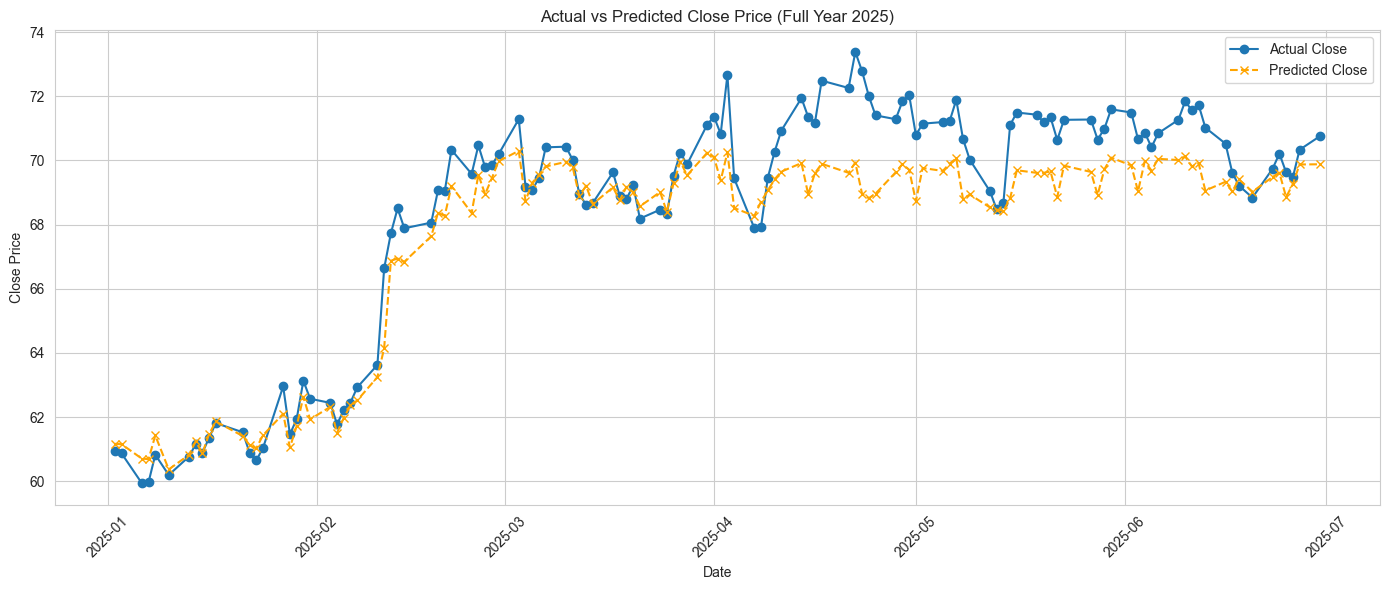

In [32]:
import matplotlib.pyplot as plt

# Copy test data and attach predictions
test_data = test_data.copy()
test_data['Predicted'] = y_pred

# Filter from 2025-01-01 to 2025-12-31
mask_2025 = (test_data['Date'] >= '2025-01-01') & (test_data['Date'] <= '2025-12-31')
plot_data = test_data.loc[mask_2025]

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(plot_data['Date'], plot_data['Close'], label='Actual Close', marker='o')
plt.plot(plot_data['Date'], plot_data['Predicted'], label='Predicted Close', linestyle='--', marker='x', color='orange')

plt.title('Actual vs Predicted Close Price (Full Year 2025)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
